In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

# Linear Model
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from math import sqrt

### 1. Create a dataframe from the csv at https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")
df.head()

,temperature,rainfall,flyers,sales
0,27.0,2.00,15,10
1,28.9,1.33,15,13
2,34.5,1.33,27,15
3,44.1,1.05,28,17
4,42.4,1.00,33,18


In [3]:
df.shape

(365, 4)

### 2. Make a baseline for predicting sales. (The mean is a good baseline)

In [4]:
baseline = df.sales.mean()
baseline

25.323287671232876

### 3. Create a new dataframe to hold residuals.

In [5]:
evaluate = pd.DataFrame()

### 4. Calculate the baseline residuals.

In [6]:
# Our x is our independent variable
evaluate["x"] = df.flyers

# Our y is our dependent variable
evaluate["y"] = df.sales
evaluate["baseline"] = df.sales.mean()

# Calculate the baseline residuals 
# Residual is predicted minus actual
evaluate["baseline_residual"] = evaluate.baseline - evaluate.y
evaluate.head()

,x,y,baseline,baseline_residual
0,15,10,25.323288,15.323288
1,15,13,25.323288,12.323288
2,27,15,25.323288,10.323288
3,28,17,25.323288,8.323288
4,33,18,25.323288,7.323288


### 5. Use ols from statsmodels to create a simple linear regression (1 independent variable, 1 dependent variable) to predict sales using flyers.

In [7]:
model = ols('sales ~ flyers', data=df).fit()
model

### 6. Use the .predict method from ols to produce all of our predictions. Add these predictions to the data.

In [8]:
# y-hat is shorthand for "predicted y" values
evaluate["yhat"] = model.predict()
evaluate.head()

,x,y,baseline,baseline_residual,yhat
0,15,10,25.323288,15.323288,14.673754
1,15,13,25.323288,12.323288,14.673754
2,27,15,25.323288,10.323288,19.727926
3,28,17,25.323288,8.323288,20.149107
4,33,18,25.323288,7.323288,22.255013


### 7. Calculate that model's residuals.

In [9]:
# Calculate the model residuals
evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head()

,x,y,baseline,baseline_residual,yhat,model_residual
0,15,10,25.323288,15.323288,14.673754,4.673754
1,15,13,25.323288,12.323288,14.673754,1.673754
2,27,15,25.323288,10.323288,19.727926,4.727926
3,28,17,25.323288,8.323288,20.149107,3.149107
4,33,18,25.323288,7.323288,22.255013,4.255013


In [ ]:
model_residual = pd.DataFrame(y_hat - train.sales).rename(columns={0:'model_residual'})
model_residual

### 8. Evaluate that model's performance and answer if the model is significant.

In [10]:
baseline_sse = (evaluate.baseline_residual**2).sum()
model_sse = (evaluate.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 6083.326244705024


In [11]:
mse = mean_squared_error(evaluate.y, evaluate.yhat)
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 6083.326244705024  which is the sum sf squared errors
MSE is 16.666647245767187  which is the average squared error
RMSE is 4.082480526073233  which is the square root of the MSE


In [34]:
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.648


In [13]:
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  2.193718738113383e-84


In [14]:
f_pval < .05

True

In [15]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

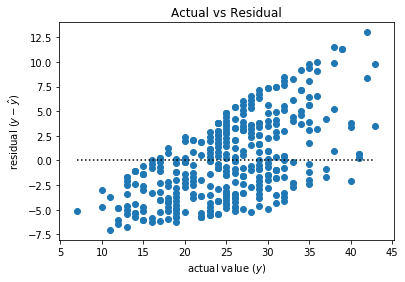

In [16]:
plot_residuals(evaluate.y, evaluate.yhat)

### Perform the steps above with the rainfall column as the model's feature. Does this model beat the baseline? Would you prefer the rainfall model over the flyers model?

In [17]:
evaluate2 = pd.DataFrame()
evaluate2["x"] = df.rainfall

# Our y is our dependent variable
evaluate2["y"] = df.sales
evaluate2["baseline"] = df.sales.mean()

# Calculate the baseline residuals 
# Residual is predicted minus actual
evaluate2["baseline_residual"] = evaluate2.baseline - evaluate2.y
evaluate2.head()

,x,y,baseline,baseline_residual
0,2.00,10,25.323288,15.323288
1,1.33,13,25.323288,12.323288
2,1.33,15,25.323288,10.323288
3,1.05,17,25.323288,8.323288
4,1.00,18,25.323288,7.323288


In [18]:
model2 = ols('sales ~ rainfall', data=df).fit()
model2

In [19]:
# y-hat is shorthand for "predicted y" values
evaluate2["yhat"] = model2.predict()
evaluate2.head()

,x,y,baseline,baseline_residual,yhat
0,2.00,10,25.323288,15.323288,-1.599602
1,1.33,13,25.323288,12.323288,13.773142
2,1.33,15,25.323288,10.323288,13.773142
3,1.05,17,25.323288,8.323288,20.197573
4,1.00,18,25.323288,7.323288,21.344793


In [20]:
# Calculate the model residuals
evaluate2["model_residual"] = evaluate2.yhat - evaluate2.y

evaluate2.head()

,x,y,baseline,baseline_residual,yhat,model_residual
0,2.00,10,25.323288,15.323288,-1.599602,-11.599602
1,1.33,13,25.323288,12.323288,13.773142,0.773142
2,1.33,15,25.323288,10.323288,13.773142,-1.226858
3,1.05,17,25.323288,8.323288,20.197573,3.197573
4,1.00,18,25.323288,7.323288,21.344793,3.344793


In [21]:
baseline2_sse = (evaluate2.baseline_residual**2).sum()
model2_sse = (evaluate2.model_residual**2).sum()

if model2_sse < baseline2_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline2_sse)
print("Model SSE", model2_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 2998.2371310300655


In [33]:
r2_2 = model2.rsquared
print('R-squared = ', round(r2_2,3))

R-squared =  0.827


In [25]:
f_pval2 = model2.f_pvalue
print("p-value for model significance = ", f_pval2)

p-value for model significance =  3.2988846597381e-140


In [26]:
f_pval2 < .05

True

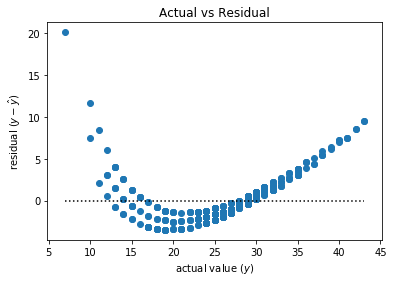

In [22]:
plot_residuals(evaluate2.y, evaluate2.yhat)

Our rainfall model outperforms our flyers model. There is less error, R-squared for the rainfall model is higher, and p-value is lower. 

### Perform the steps above with the log_rainfall column as the model's feature. Does this model beat the baseline? Would you prefer the log_rainfall model over the flyers model? Would you prefer the model built with log_rainfall over the rainfall model from before?

In [23]:
df["log_rainfall"] = np.log(df.rainfall)
df.head()

,temperature,rainfall,flyers,sales,log_rainfall
0,27.0,2.00,15,10,0.693147
1,28.9,1.33,15,13,0.285179
2,34.5,1.33,27,15,0.285179
3,44.1,1.05,28,17,0.048790
4,42.4,1.00,33,18,0.000000


In [27]:
evaluate3 = pd.DataFrame()
evaluate3["x"] = df.log_rainfall

# Our y is our dependent variable
evaluate3["y"] = df.sales
evaluate3["baseline"] = df.sales.mean()

# Calculate the baseline residuals 
# Residual is predicted minus actual
evaluate3["baseline_residual"] = evaluate3.baseline - evaluate3.y
evaluate3.head()

,x,y,baseline,baseline_residual
0,0.693147,10,25.323288,15.323288
1,0.285179,13,25.323288,12.323288
2,0.285179,15,25.323288,10.323288
3,0.048790,17,25.323288,8.323288
4,0.000000,18,25.323288,7.323288


In [28]:
model3 = ols('sales ~ log_rainfall', data=df).fit()
model3

In [29]:
# y-hat is shorthand for "predicted y" values
evaluate3["yhat"] = model3.predict()
evaluate3.head()

,x,y,baseline,baseline_residual,yhat
0,0.693147,10,25.323288,15.323288,3.688573
1,0.285179,13,25.323288,12.323288,13.198359
2,0.285179,15,25.323288,10.323288,13.198359
3,0.048790,17,25.323288,8.323288,18.708608
4,0.000000,18,25.323288,7.323288,19.845912


In [30]:
# Calculate the model residuals
evaluate3["model_residual"] = evaluate3.yhat - evaluate3.y

evaluate3.head()

,x,y,baseline,baseline_residual,yhat,model_residual
0,0.693147,10,25.323288,15.323288,3.688573,-6.311427
1,0.285179,13,25.323288,12.323288,13.198359,0.198359
2,0.285179,15,25.323288,10.323288,13.198359,-1.801641
3,0.048790,17,25.323288,8.323288,18.708608,1.708608
4,0.000000,18,25.323288,7.323288,19.845912,1.845912


In [31]:
baseline3_sse = (evaluate3.baseline_residual**2).sum()
model3_sse = (evaluate3.model_residual**2).sum()

if model3_sse < baseline3_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline3_sse)
print("Model SSE", model3_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 952.3253474293448


In [32]:
r2_3 = model3.rsquared
print('R-squared = ', round(r2_3,3))

R-squared =  0.945


In [35]:
f_pval3 = model3.f_pvalue
print("p-value for model significance = ", f_pval3)

p-value for model significance =  1.2242624097795882e-230


In [36]:
f_pval3 < .05

True

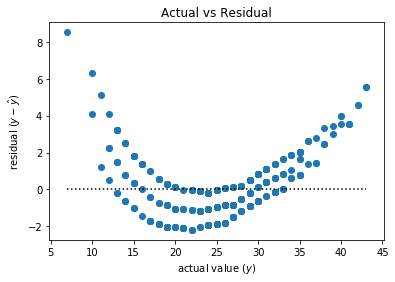

In [37]:
plot_residuals(evaluate3.y, evaluate3.yhat)

Log_rainfall outperforms rainfall. Higher r-squared, lower RMSE, lower p-value.

### Perform the steps above with the temperature column as the model's only feature. Does this model beat the baseline? Would you prefer the rainfall, log_rainfall, or the flyers model?

In [38]:
evaluate4 = pd.DataFrame()
evaluate4["x"] = df.temperature

# Our y is our dependent variable
evaluate4["y"] = df.sales
evaluate4["baseline"] = df.sales.mean()

# Calculate the baseline residuals 
# Residual is predicted minus actual
evaluate4["baseline_residual"] = evaluate4.baseline - evaluate4.y
evaluate4.head()

,x,y,baseline,baseline_residual
0,27.0,10,25.323288,15.323288
1,28.9,13,25.323288,12.323288
2,34.5,15,25.323288,10.323288
3,44.1,17,25.323288,8.323288
4,42.4,18,25.323288,7.323288


In [39]:
model4 = ols('sales ~ temperature', data=df).fit()
model4

In [40]:
# y-hat is shorthand for "predicted y" values
evaluate4["yhat"] = model4.predict()
evaluate4.head()

,x,y,baseline,baseline_residual,yhat
0,27.0,10,25.323288,15.323288,11.112301
1,28.9,13,25.323288,12.323288,11.912772
2,34.5,15,25.323288,10.323288,14.272055
3,44.1,17,25.323288,8.323288,18.316540
4,42.4,18,25.323288,7.323288,17.600329


In [41]:
# Calculate the model residuals
evaluate4["model_residual"] = evaluate4.yhat - evaluate4.y

evaluate4.head()

,x,y,baseline,baseline_residual,yhat,model_residual
0,27.0,10,25.323288,15.323288,11.112301,1.112301
1,28.9,13,25.323288,12.323288,11.912772,-1.087228
2,34.5,15,25.323288,10.323288,14.272055,-0.727945
3,44.1,17,25.323288,8.323288,18.316540,1.316540
4,42.4,18,25.323288,7.323288,17.600329,-0.399671


In [42]:
baseline4_sse = (evaluate4.baseline_residual**2).sum()
model4_sse = (evaluate4.model_residual**2).sum()

if model4_sse < baseline4_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline4_sse)
print("Model SSE", model4_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 349.977815203168


In [43]:
r2_4 = model4.rsquared
print('R-squared = ', round(r2_4,3))

R-squared =  0.98


In [44]:
f_pval4 = model4.f_pvalue
print("p-value for model significance = ", f_pval4)

p-value for model significance =  1.492364042585725e-309


In [45]:
f_pval4 < .05

True

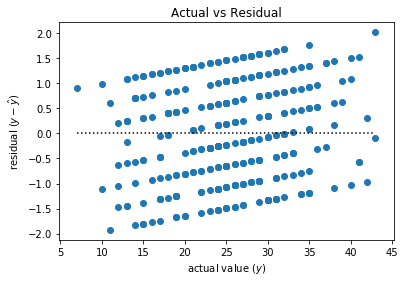

In [46]:
plot_residuals(evaluate4.y, evaluate4.yhat)

The temperature model outperforms the flyers, rainfall, and log_rainfall models.

### Which of these 4 single regression models would you want to move forward with?

The temperature model.

# Tips Dataset

### 1. Load the tips dataset from pydataset or seaborn

In [47]:
df_tips = data("tips")
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Define your baseline for "tip". Our goal will be to see if we can make a model that is better than baseline for predicting tips on total_bill.

In [49]:
baseline_tips = df_tips.tip.mean()
baseline_tips

2.9982786885245902

### 3. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. Here is some sample code to get you started:


In [51]:
model5 = ols('tip ~ total_bill', data=df_tips).fit()
model5
#predictions = model5.predict(df.x)

In [53]:
evaluate5 = pd.DataFrame()
evaluate5["x"] = df_tips.total_bill

# Our y is our dependent variable
evaluate5["y"] = df_tips.tip
evaluate5["baseline"] = df_tips.tip.mean()

# Calculate the baseline residuals 
# Residual is predicted minus actual
evaluate5["baseline_residual"] = evaluate5.baseline - evaluate5.y
evaluate5.head()

,x,y,baseline,baseline_residual
1,16.99,1.01,2.998279,1.988279
2,10.34,1.66,2.998279,1.338279
3,21.01,3.50,2.998279,-0.501721
4,23.68,3.31,2.998279,-0.311721
5,24.59,3.61,2.998279,-0.611721


In [54]:
# y-hat is shorthand for "predicted y" values
evaluate5["yhat"] = model5.predict()
evaluate5.head()

,x,y,baseline,baseline_residual,yhat
1,16.99,1.01,2.998279,1.988279,2.704636
2,10.34,1.66,2.998279,1.338279,2.006223
3,21.01,3.50,2.998279,-0.501721,3.126835
4,23.68,3.31,2.998279,-0.311721,3.407250
5,24.59,3.61,2.998279,-0.611721,3.502822


In [56]:
# Calculate the model residuals
evaluate5["model_residual"] = evaluate5.yhat - evaluate5.y

evaluate5.head()

,x,y,baseline,baseline_residual,yhat,model_residual
1,16.99,1.01,2.998279,1.988279,2.704636,1.694636
2,10.34,1.66,2.998279,1.338279,2.006223,0.346223
3,21.01,3.50,2.998279,-0.501721,3.126835,-0.373165
4,23.68,3.31,2.998279,-0.311721,3.407250,0.097250
5,24.59,3.61,2.998279,-0.611721,3.502822,-0.107178


In [57]:
baseline5_sse = (evaluate5.baseline_residual**2).sum()
model5_sse = (evaluate5.model_residual**2).sum()

if model5_sse < baseline5_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline5_sse)
print("Model SSE", model5_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 465.2124770491804
Model SSE 252.788743850776


In [62]:
mse5 = mean_squared_error(evaluate5.y, evaluate5.yhat)
rmse5 = sqrt(mse5)

print("SSE is", model5_sse, " which is the sum sf squared errors")
print("MSE is", mse5, " which is the average squared error")
print("RMSE is", rmse5, " which is the square root of the MSE")

SSE is 252.788743850776  which is the sum sf squared errors
MSE is 1.036019442011377  which is the average squared error
RMSE is 1.0178504025697377  which is the square root of the MSE


In [58]:
r2_5 = model5.rsquared
print('R-squared = ', round(r2_5,3))

R-squared =  0.457


In [59]:
f_pval5 = model5.f_pvalue
print("p-value for model significance = ", f_pval5)

p-value for model significance =  6.692470646863376e-34


In [60]:
f_pval5 < .05

True

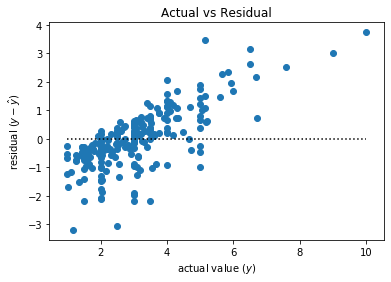

In [61]:
plot_residuals(evaluate5.y, evaluate5.yhat)